In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from data_gen_reg import Generate

In [4]:
gen = Generate(50)

In [5]:
df = gen.make_data()
df.head()


,X,y
0,0.0,17.163357
1,1.0,23.832966
2,2.0,3.185882
3,3.0,24.457743
4,4.0,-2.239129


In [6]:
X = df[["X"]].values
y = df[["y"]].values

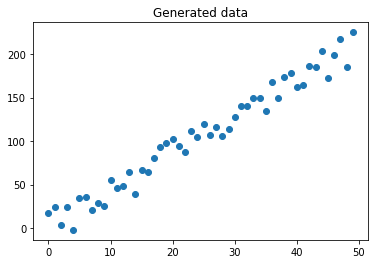

In [8]:
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()